In [1]:
# Start writing code here..# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [2]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [3]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


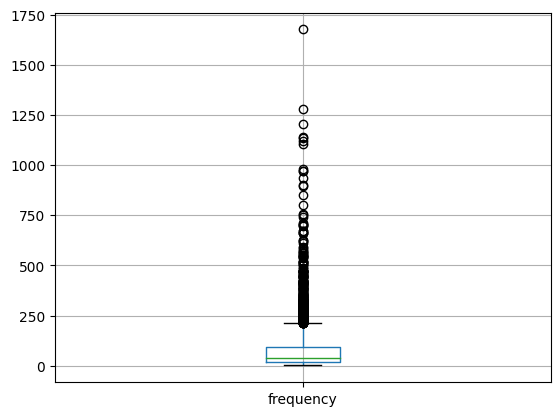

In [4]:
# Create box plots to check for outliers
boxplot1 = rfm.boxplot(column=['frequency'])  
plt.show()


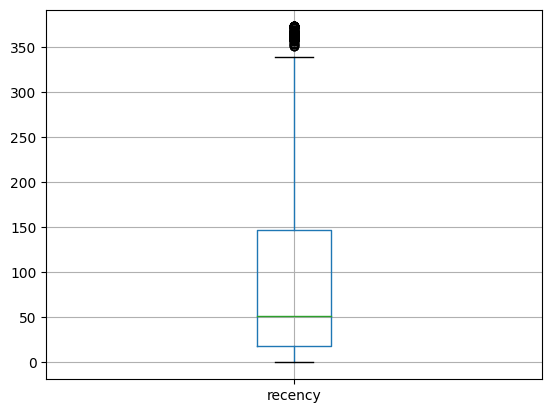

In [5]:
boxplot = rfm.boxplot(column=['recency'])  
plt.show()

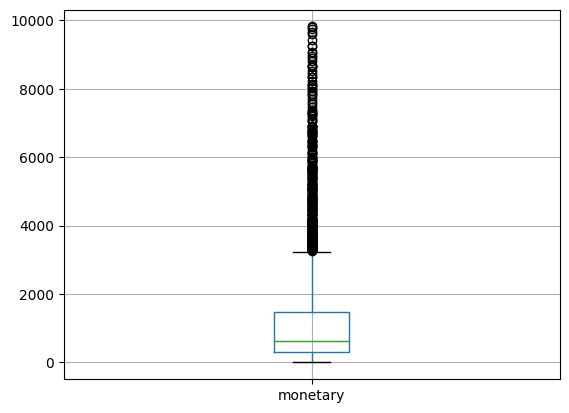

In [6]:
boxplot = rfm.boxplot(column=['monetary'])  
plt.show()

In [7]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency  monetary
CustomerID                               
13256.0     0.795485   0.667799  0.803362
16738.0     2.041592   0.667799  0.801337
16454.0     0.494735   0.659217  0.799312
14792.0     0.304260   0.659217  0.799312
17956.0     1.560391   0.667799  0.795262
...              ...        ...       ...
14733.0     0.775435   1.057341  5.666188
13458.0     0.865660   2.602242  5.707361
15078.0     0.865660   3.100044  5.772833
13199.0     0.905760   0.344969  5.822780
13001.0     0.895735   2.233182  5.823455

[3836 rows x 3 columns]


In [8]:
rfm_clean = rfm[(z < 3).all(axis=1)]

Q. What is the purpose of the above code

The Purpose of above code is find the z-score for each CustomerID and based on the z-score we can determine if it is an outlier or not. If z-score is greater than 3 which means the data point fall more than 3 standard deviations ( >+3 SD) away from the mean which is generally considered to be outlier (in a data that follows normal distribution) . And the reason which we have not considered negative value because we already cleaned data while performing RFM analysis in project part 1.

In [9]:
rfm.shape


(3836, 3)

In [10]:
rfm_clean.shape


(3683, 3)

Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

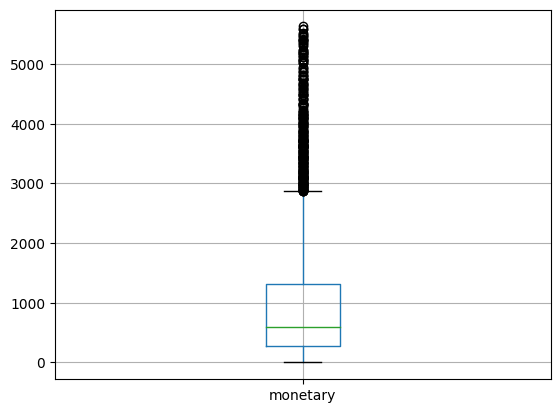

In [11]:
boxplot = rfm_clean.boxplot(column=['monetary'])  
plt.show()

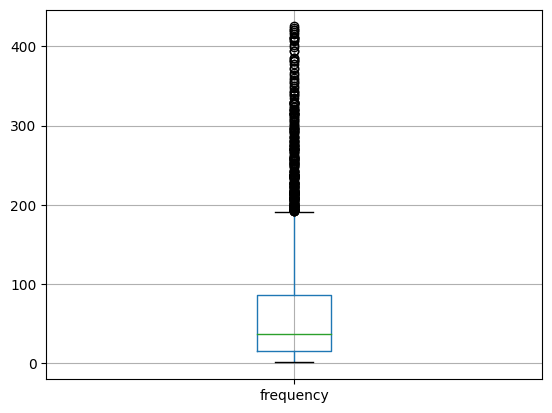

In [12]:
boxplot = rfm_clean.boxplot(column=['frequency'])  
plt.show()

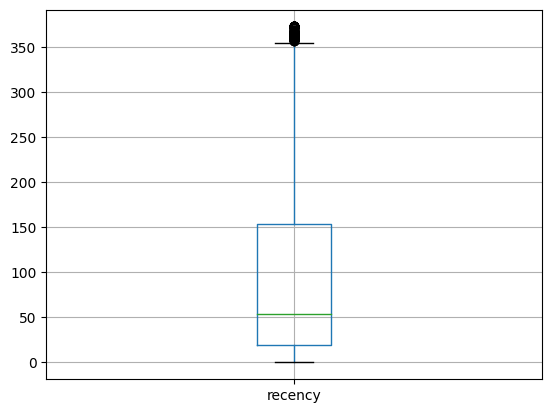

In [13]:
boxplot = rfm_clean.boxplot(column=['recency'])  
plt.show()

Box plots helps us to see the range of the values (medians, quartiles and higher/lower values), when you compare the box plots of original data against the cleaned up data - for each of the 3 characteristics (R F and M) we can see that outliers are removed and the box ranges have been redefined

Recency: Not much change with Quartile ranges but median has improved a bit as extreme values are deducted from the whole set

Frequency: everything is set upto ~400 whereas earlier there were some values even more than 1000

Monetary: some of the customers with extreme purchase totals (~10000) are removed hence everything is maxed out till 6000

Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

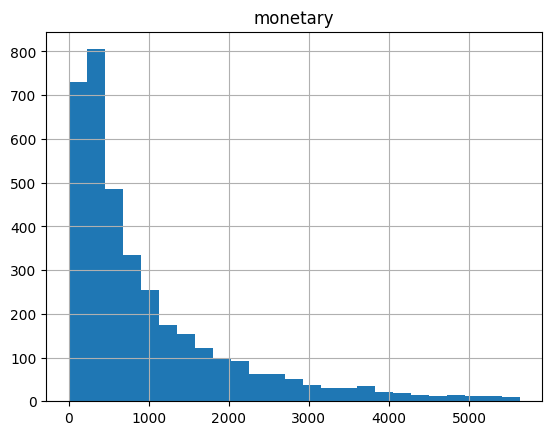

In [14]:
rfm_clean.hist(column='monetary', bins =25)
plt.show()

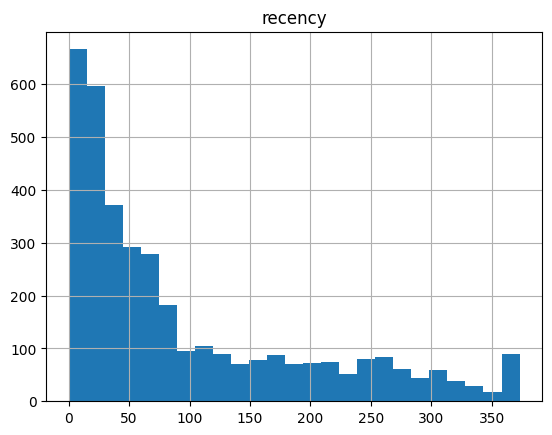

In [15]:
rfm_clean.hist(column ='recency', bins =25)
plt.show()

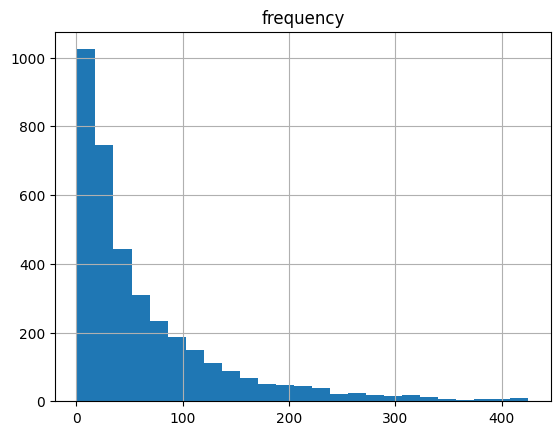

In [16]:
rfm_clean.hist(column='frequency', bins=25)
plt.show()

Comparing the Histograms with cleaned up data against the histograms made with RFM data - the data is better spread where outliers are cleaned up. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. the new histograms show better smooth spread and all became unimodal, so the grouping of data is also reduced

Perform cluster analysis using K-means clustering with the original rfm dataframe


In [17]:
X = rfm
X.head()


,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


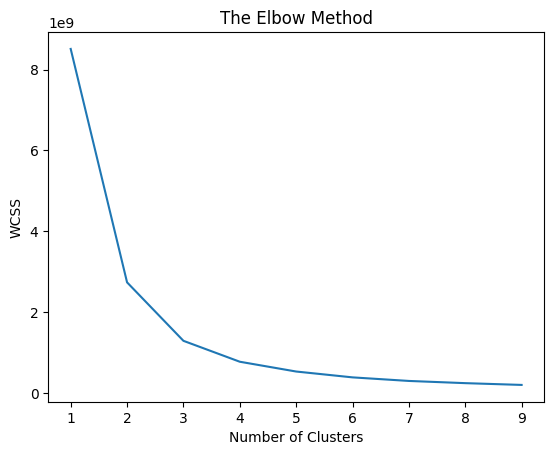

In [18]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [20]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [21]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [22]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,0
16738.0,297,1,3,0
16454.0,44,2,6,0
14792.0,63,2,6,0
17956.0,249,1,12,0


## Plot the graphs

In [23]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
            marker="X", c="r", label="centroids")
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], 
            marker="X", c="r", label="centroids")
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", label="centroids")

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


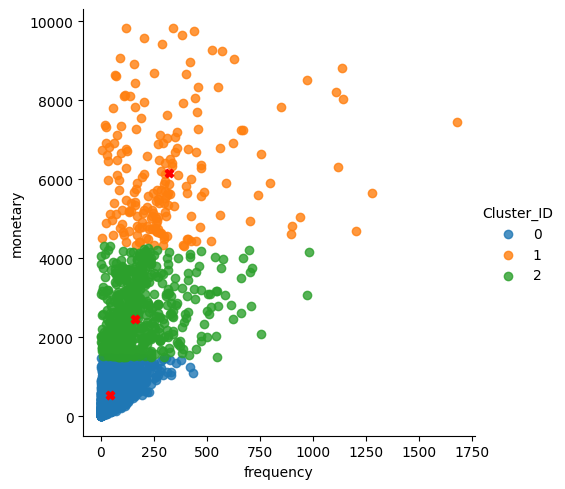

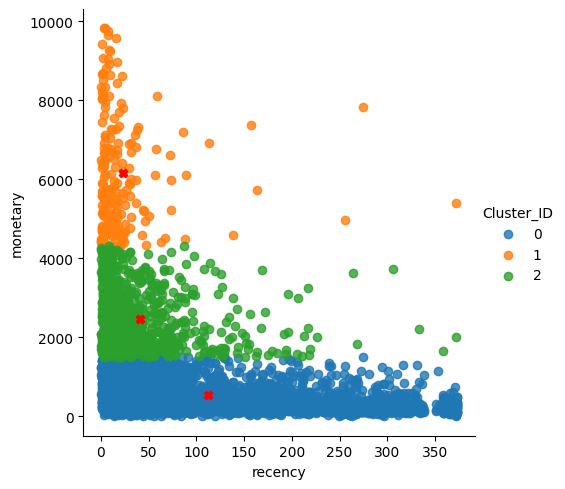

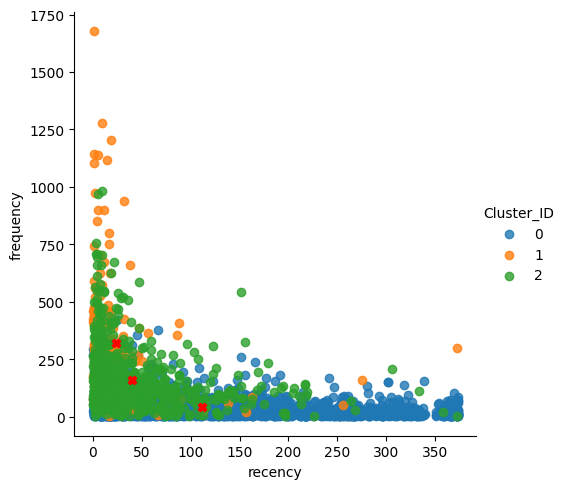

In [24]:
plt.show()

Q. Comment on the plots

Above 3 scatter plots shows  all the combinations for 3 characteristics (RCM). looking at the above, combination between Frequency and Recency doesn't seems to create clusters in a good way hence Monetary seems to be the factor which contributes maximum in deciding the clusters. right now the data with outliers is used hence the clusters are sparse in nature and are spread in bigger ranges.

in First plot: as the frequency increases monetary value also increases, these are 3 clusters described by the k means clustering algorithm. 1st cluster is lower frequency and lower monetary value and is most dense, 2nd cluster is similar frequency but higher monetary values and the last cluster is highly sparse with high frequency and higher monetary (this cluster has most of the outlier monetary values in it) 

in second plot: there are 3 clusters - less recent (1 year) and low monetary group, moderate recent (5-6 months) and medium monetary spenders (2K - 4K), and the last one with very recent and high spenders. again the density of the cluster decreases from first to third cluster (due to presence of outliers)

in third plot: there are 3 clusters - and all the 3 clusters are overlapping and intermingling. thus recency and frequency alone are not good parameters to cluster the customers, 

 Q. Perform Cluster Analysis with k=4

In [25]:
kmeans1 = KMeans(n_clusters = 4)
y_kmeans1 = kmeans1.fit_predict(X)
y_kmeans1

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [26]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans1

In [27]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans1.cluster_centers_[:,1], kmeans1.cluster_centers_[:,2], 
            marker="X", c="r", label="centroids")
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,2], 
            marker="X", c="r", label="centroids")
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], 
            marker="X", c="r", label="centroids")

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


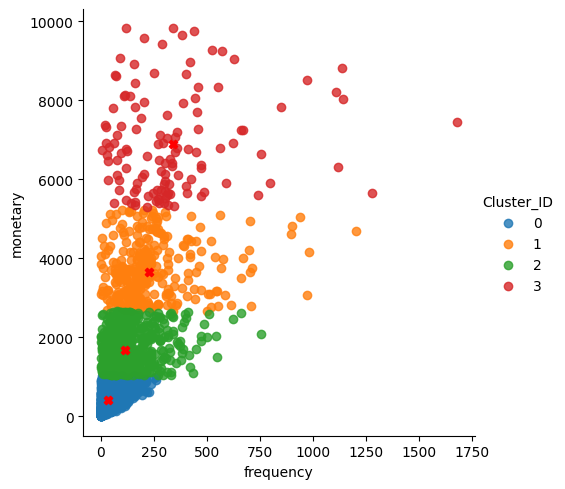

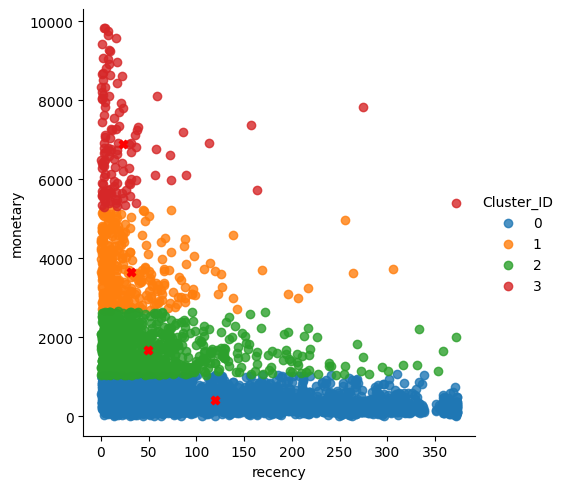

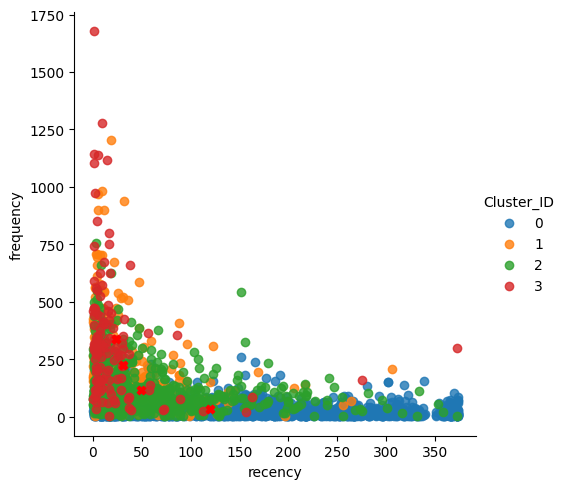

In [28]:
plt.show()

In [29]:
for i in range(4):
     rfm_mean= rfm.groupby(['Cluster_ID']).mean()


In [30]:
rfm_mean

,recency,frequency,monetary
Cluster_ID,,,
0,119.728424,34.769596,423.391132
1,31.145897,226.197568,3657.112462
2,49.562937,114.497669,1682.842657
3,23.455285,339.975610,6903.650407


Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [31]:
X1= rfm_clean

In [32]:
X1.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


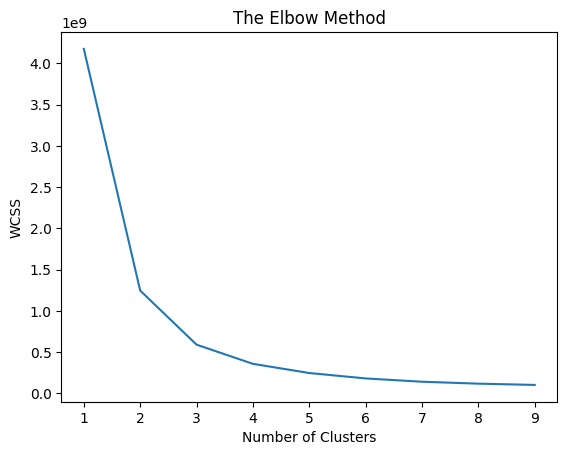

In [33]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Fitting K Means to the Datatset using k = 4

kmeans_clean = KMeans(n_clusters = 4)
y_kmeans1 = kmeans_clean.fit_predict(X1)

In [35]:
y_kmeans1

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [36]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeans1

/tmp/ipykernel_198/500255469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID'] = y_kmeans1


In [37]:
rfm_clean.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,0
16738.0,297,1,3,0
16454.0,44,2,6,0
14792.0,63,2,6,0
17956.0,249,1,12,0


In [38]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans_clean.cluster_centers_[:,1], kmeans_clean.cluster_centers_[:,2], 
            marker="X", c="r", label="centroids")


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


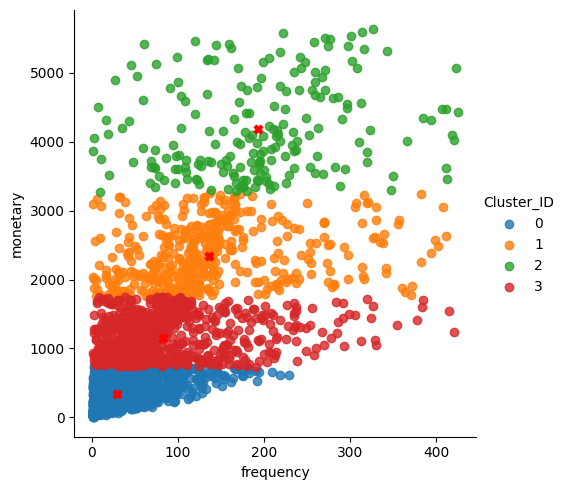

In [39]:
plt.show()

above graph have 4 clusters on a dataset without Outliers - here we see smaller spread, as higher monetary values are removed, also the centroids are lower in value as compared to full volume of data (including outliers). the spread is sparse and clear also very definite divide is achieved in clusters. like earlier the top cluster is having a large spread but its better than full volume spread

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


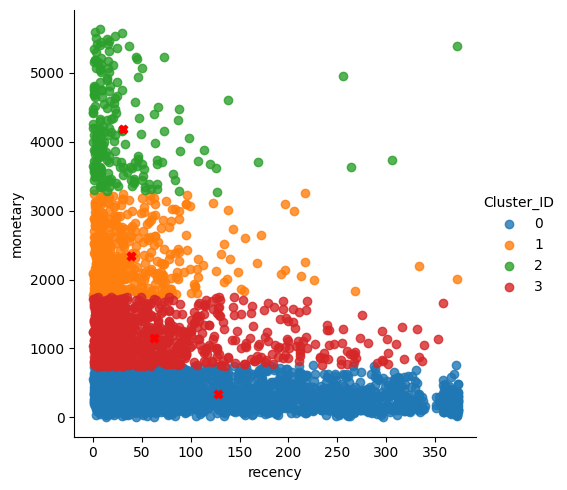

In [40]:
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans_clean.cluster_centers_[:,0], kmeans_clean.cluster_centers_[:,2], 
            marker="X", c="r", label="centroids")
plt.show()

4 clusters (with monetary and recency), as the data is without the outliers the centroids are smaller in figures , the cluster boundaries are well defined and more definitive. again the top most cluster is sparse but not as much as earlier one (with full volume date)

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


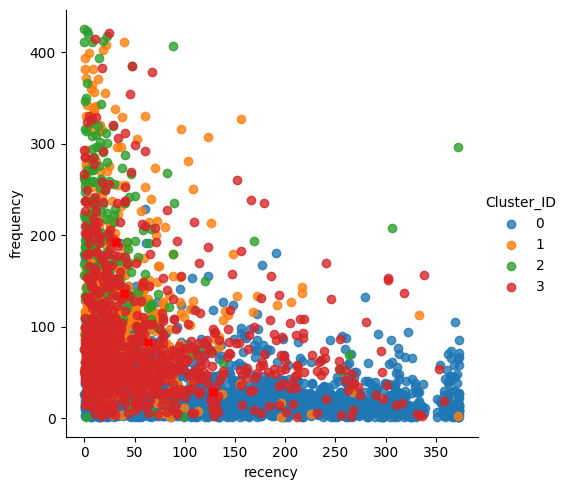

In [41]:
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
plt.scatter(kmeans_clean.cluster_centers_[:,0], kmeans_clean.cluster_centers_[:,1], 
            marker="X", c="r", label="centroids")
plt.show()

like full volume recency and frequency plot are not a good way to define clustering, as the clusters overlap in one another. there are no definitive boundaries (same as full volume one). also centroids are scattered all over the place. by this we can conclude that Monetary is a good characteristic when paired with frequency or recency to do clustering analysis of customers  

Calculate mean for every cluster

In [42]:
for i in range(4): 
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,128.292365,29.091248,341.770950
1,39.238938,136.601770,2344.763274
2,31.114428,192.845771,4180.358209
3,62.959184,82.846939,1155.453515


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>